## Analysing two csv files related to total population and diabetes prevalance rate of all countries

Loading all required libraries

In [7]:
library(tidyverse)
library(magrittr) # better handling of pipes
library(purrr) # to work with lists and map functions
library(glue) # to paste strings 
library(stringr) # to hand strings
library(rvest) # to make scraping easier
library(polite) #polite version of rvest
#library(htmltab)
library(dplyr)
library(tidyr)

In [8]:
library(visdat)
library(skimr)
library(readr)

 Reading the file for population of all countries. Total population is based on the de facto definition of population, which counts all residents regardless of legal status or citizenship. The values shown are midyear estimates. This data is sourced from following sources.
 (1) United Nations Population Division. World Population Prospects: 2017 Revision
 (2) Census reports and other statistical publications from national statistical offices
 (3) Eurostat: Demographic Statistics
 (4) United Nations Statistical Division. Population and Vital Statistics Reprot (various years)
 (5) U.S. Census Bureau: International Database 
 (6) Secretariat of the Pacific Community: Statistics and Demography Programme.

In [9]:
population_df <- read_csv(file = "API_SP.POP.TOTL_DS2_en_csv_v2_10134466.csv")

Parsed with column specification:
cols(
  .default = col_double(),
  `Country Name` = col_character(),
  `Country Code` = col_character(),
  `Indicator Name` = col_character(),
  `Indicator Code` = col_character()
)
See spec(...) for full column specifications.


In [10]:
population_df %>% glimpse()

Observations: 264
Variables: 62
$ `Country Name`   <chr> "Aruba", "Afghanistan", "Angola", "Albania", "Ando...
$ `Country Code`   <chr> "ABW", "AFG", "AGO", "ALB", "AND", "ARB", "ARE", "...
$ `Indicator Name` <chr> "Population, total", "Population, total", "Populat...
$ `Indicator Code` <chr> "SP.POP.TOTL", "SP.POP.TOTL", "SP.POP.TOTL", "SP.P...
$ `1960`           <dbl> 54211, 8996351, 5643182, 1608800, 13411, 92490932,...
$ `1961`           <dbl> 55438, 9166764, 5753024, 1659800, 14375, 95044497,...
$ `1962`           <dbl> 56225, 9345868, 5866061, 1711319, 15370, 97682294,...
$ `1963`           <dbl> 56695, 9533954, 5980417, 1762621, 16412, 100411076...
$ `1964`           <dbl> 57032, 9731361, 6093321, 1814135, 17469, 103239902...
$ `1965`           <dbl> 57360, 9938414, 6203299, 1864791, 18549, 106174988...
$ `1966`           <dbl> 57715, 10152331, 6309770, 1914573, 19647, 10923059...
$ `1967`           <dbl> 58055, 10372630, 6414995, 1965598, 20758, 11240693...
$ `1968`           <

Reading the file of diabetes prevalance rate of all countries. Diabetes prevalence refers to the percentage of people ages 20-79 who have type 1 or type 2 diabetes. This data is sourced from International Diabetes Federation, Diabetes Atlas.

In [11]:
diabetes_df <- read_csv(file = "API_SH.STA.DIAB.ZS_DS2_en_csv_v2_10136460.csv")

Parsed with column specification:
cols(
  .default = col_character(),
  `2017` = col_double()
)
See spec(...) for full column specifications.


In [12]:
#Selecting only the data for 2017 since other columns dont have any value
diabetes_df<-diabetes_df %>% select('Country Name','Country Code','Indicator Name','Indicator Code','2017')

In [13]:
diabetes_df %>% glimpse()

Observations: 264
Variables: 5
$ `Country Name`   <chr> "Aruba", "Afghanistan", "Angola", "Albania", "Ando...
$ `Country Code`   <chr> "ABW", "AFG", "AGO", "ALB", "AND", "ARB", "ARE", "...
$ `Indicator Name` <chr> "Diabetes prevalence (% of population ages 20 to 7...
$ `Indicator Code` <chr> "SH.STA.DIAB.ZS", "SH.STA.DIAB.ZS", "SH.STA.DIAB.Z...
$ `2017`           <dbl> 11.62000, 9.59000, 3.94000, 10.08000, 7.97000, 12....


In [14]:
#Selecting only the required columns for joining
population_2017_df<-population_df %>% select('Country Code','2017')

In [15]:
population_2017_df %>%  head()

Country Code,2017
ABW,105264
AFG,35530081
AGO,29784193
ALB,2873457
AND,76965
ARB,414491886


In [16]:
diabetes_population<-diabetes_df %>% inner_join(population_2017_df,by="Country Code") #%>% rename(replace=c("2017.y"="TotalPopulation")

In [17]:
#Renaming the column of 2017 in two tables to Population_2017 and Diabetes_prevalance_2017 respectively
population_2017_df  <- population_2017_df %>% rename("Population_2017" = !!names(.[2]))
diabetes_df  <- diabetes_df %>% rename("Diabetes_prevalance_2017" = !!names(.[5]))

In [18]:
population_2017_df %>% head()
diabetes_df %>% head()

Country Code,Population_2017
ABW,105264
AFG,35530081
AGO,29784193
ALB,2873457
AND,76965
ARB,414491886


Country Name,Country Code,Indicator Name,Indicator Code,Diabetes_prevalance_2017
Aruba,ABW,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,11.62000
Afghanistan,AFG,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,9.59000
Angola,AGO,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,3.94000
Albania,ALB,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,10.08000
Andorra,AND,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,7.97000
Arab World,ARB,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,12.07702


In [19]:
#Joining the population data and diabetes data
diabetes_population<-diabetes_df %>% inner_join(population_2017_df,by="Country Code") 

In [20]:
diabetes_population %>% head()

Country Name,Country Code,Indicator Name,Indicator Code,Diabetes_prevalance_2017,Population_2017
Aruba,ABW,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,11.62000,105264
Afghanistan,AFG,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,9.59000,35530081
Angola,AGO,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,3.94000,29784193
Albania,ALB,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,10.08000,2873457
Andorra,AND,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,7.97000,76965
Arab World,ARB,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,12.07702,414491886


In [21]:
#Converting the diabetes pevalance percentage to population
diabetes_population<-diabetes_population %>% mutate(New_diabetes_population=(Diabetes_prevalance_2017/100)*Population_2017)

In [22]:
diabetes_population %>% head()

Country Name,Country Code,Indicator Name,Indicator Code,Diabetes_prevalance_2017,Population_2017,New_diabetes_population
Aruba,ABW,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,11.62000,105264,12231.68
Afghanistan,AFG,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,9.59000,35530081,3407334.77
Angola,AGO,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,3.94000,29784193,1173497.20
Albania,ALB,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,10.08000,2873457,289644.47
Andorra,AND,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,7.97000,76965,6134.11
Arab World,ARB,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,12.07702,414491886,50058269.71


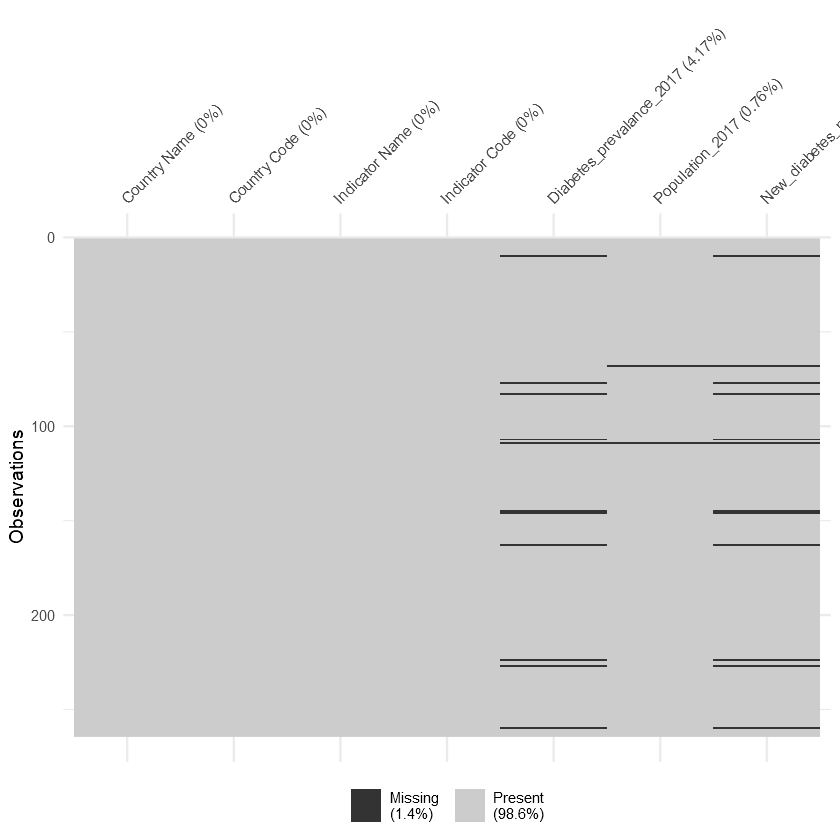

In [23]:
diabetes_population %>% vis_miss()

In [24]:
diabetes_free_countries<-diabetes_population %>% filter(is.na(Diabetes_prevalance_2017) == TRUE) 

In [25]:
diabetes_free_countries<-diabetes_free_countries %>% drop_na(Population_2017)
diabetes_population<-diabetes_population %>% drop_na(Population_2017)

In [26]:
diabetes_free_countries

Country Name,Country Code,Indicator Name,Indicator Code,Diabetes_prevalance_2017,Population_2017,New_diabetes_population
American Samoa,ASM,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,NA,55641,NA
Faroe Islands,FRO,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,NA,49290,NA
Gibraltar,GIB,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,NA,34571,NA
Isle of Man,IMN,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,NA,84287,NA
"Macao SAR, China",MAC,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,NA,622567,NA
St. Martin (French part),MAF,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,NA,32125,NA
Northern Mariana Islands,MNP,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,NA,55144,NA
Sint Maarten (Dutch part),SXM,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,NA,41109,NA
Turks and Caicos Islands,TCA,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,NA,35446,NA
Kosovo,XKX,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,NA,1830700,NA


In [27]:
diabetes_free_countries<-diabetes_free_countries %>% replace_na(list(Diabetes_prevalance_2017=0,New_diabetes_population=0))
diabetes_population<-diabetes_population %>% replace_na(list(Diabetes_prevalance_2017=0,New_diabetes_population=0))

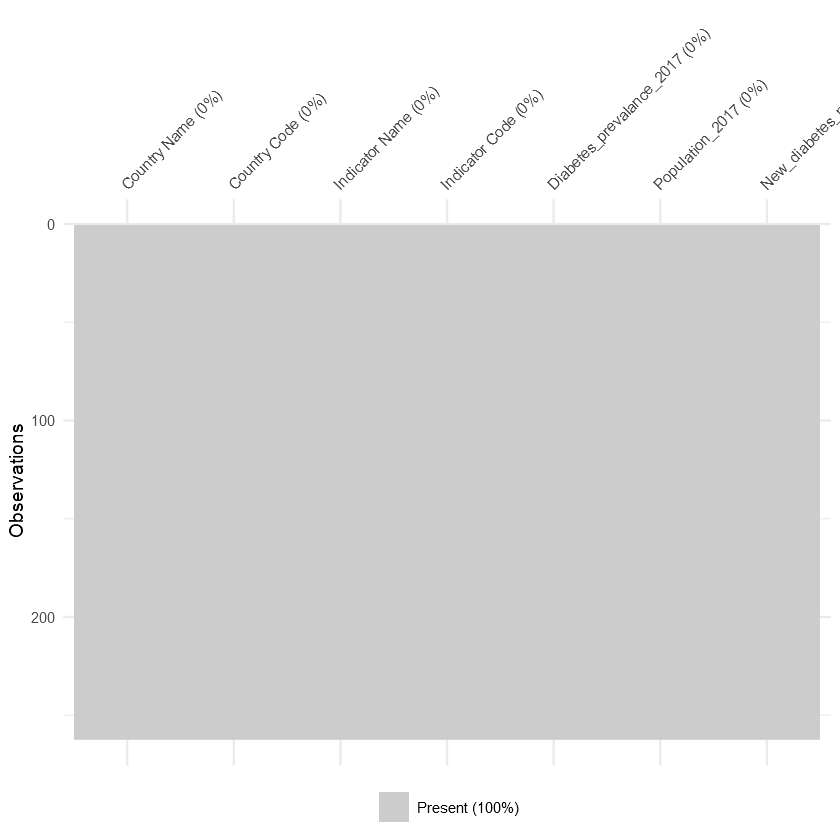

In [28]:
diabetes_population %>% vis_miss()

In [29]:
diabetes_population %>% head()

Country Name,Country Code,Indicator Name,Indicator Code,Diabetes_prevalance_2017,Population_2017,New_diabetes_population
Aruba,ABW,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,11.62000,105264,12231.68
Afghanistan,AFG,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,9.59000,35530081,3407334.77
Angola,AGO,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,3.94000,29784193,1173497.20
Albania,ALB,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,10.08000,2873457,289644.47
Andorra,AND,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,7.97000,76965,6134.11
Arab World,ARB,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,12.07702,414491886,50058269.71


In [30]:
install.packages("rworldmap")

Installing package into 'C:/Users/acer/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


package 'rworldmap' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\acer\AppData\Local\Temp\RtmpwBUpEE\downloaded_packages


In [31]:
library(rworldmap)
mapped_data <- joinCountryData2Map(diabetes_population , joinCode = "NAME", 
    nameJoinColumn = "Country Name")

Loading required package: sp
### Welcome to rworldmap ###
For a short introduction type : 	 vignette('rworldmap')


207 codes from your data successfully matched countries in the map
55 codes from your data failed to match with a country code in the map
36 codes from the map weren't represented in your data


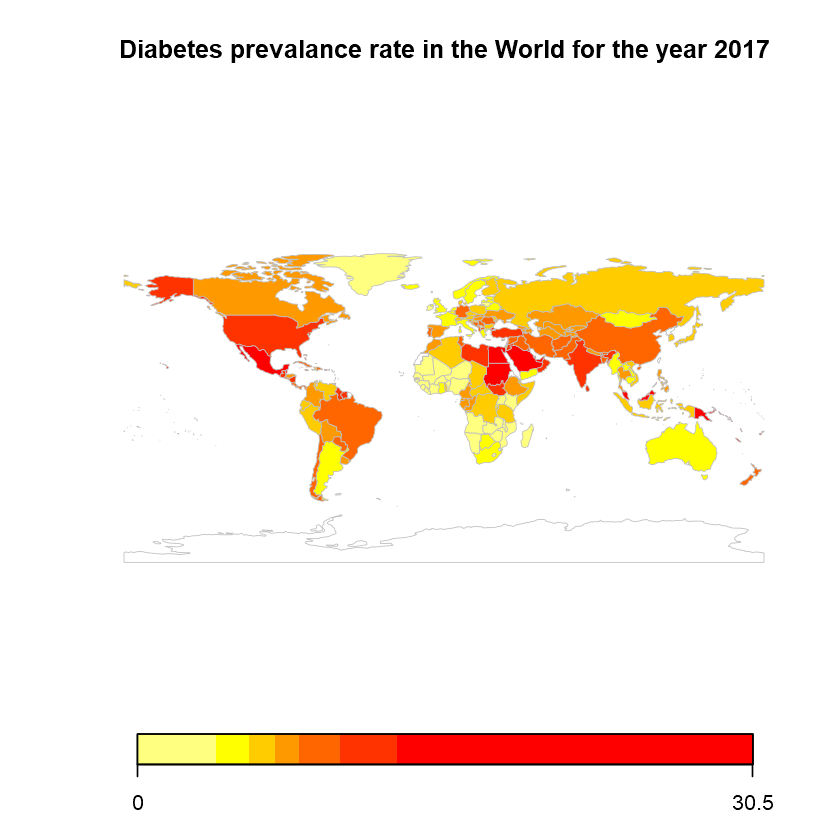

In [35]:
mapCountryData(
    mapped_data, nameColumnToPlot = "Diabetes_prevalance_2017",
    mapTitle = "Diabetes prevalance rate in the World for the year 2017",
    addLegend = "TRUE"
)


In [36]:
diabetes_free_countries %>% head()

Country Name,Country Code,Indicator Name,Indicator Code,Diabetes_prevalance_2017,Population_2017,New_diabetes_population
American Samoa,ASM,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,0,55641,0
Faroe Islands,FRO,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,0,49290,0
Gibraltar,GIB,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,0,34571,0
Isle of Man,IMN,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,0,84287,0
"Macao SAR, China",MAC,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,0,622567,0
St. Martin (French part),MAF,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,0,32125,0


In [37]:
diabetes_population %>% arrange(desc(Diabetes_prevalance_2017)) %>% slice(1:20)

Country Name,Country Code,Indicator Name,Indicator Code,Diabetes_prevalance_2017,Population_2017,New_diabetes_population
Marshall Islands,MHL,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,30.53,53127,16219.673
Tuvalu,TUV,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,27.25,11192,3049.820
Nauru,NRU,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,24.07,13649,3285.314
New Caledonia,NCL,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,23.36,280460,65515.456
Kiribati,KIR,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,22.66,116398,26375.787
French Polynesia,PYF,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,22.63,283007,64044.484
Mauritius,MUS,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,22.02,1264613,278467.783
Guam,GUM,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,21.52,164229,35342.081
Solomon Islands,SLB,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,18.68,611343,114198.872
Saudi Arabia,SAU,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,17.72,32938213,5836651.344


In [38]:
diabetes_population %>% arrange(desc(Population_2017)) %>% slice(1:20)

Country Name,Country Code,Indicator Name,Indicator Code,Diabetes_prevalance_2017,Population_2017,New_diabetes_population
World,WLD,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,8.509630,7530360149,640805762
IDA & IBRD total,IBT,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,8.633700,6353204601,548516599
Low & middle income,LMY,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,8.659333,6281293921,543918158
Middle income,MIC,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,8.995415,5548845363,499141642
IBRD only,IBD,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,9.318548,4743263932,442003327
Early-demographic dividend,EAR,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,9.326121,3213426923,299688074
Lower middle income,LMC,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,8.710050,2972642807,258918684
Upper middle income,UMC,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,9.283964,2576202556,239173716
East Asia & Pacific,EAS,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,8.572328,2314364990,198394960
Late-demographic dividend,LTE,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,9.003640,2278227192,205123381


In [39]:
#devtools::install_github("UrbanInstitute/urbnmapr")

Skipping install of 'urbnmapr' from a github remote, the SHA1 (593a49e8) has not changed since last install.
  Use `force = TRUE` to force installation


In [40]:
library(urbnmapr)



In [42]:
mortality_df <- read.csv("US MORTALITY.csv")

In [43]:
header_true <- function(df) {
  names(df) <- as.character(unlist(df[1,]))
  df[-1,]
}

#Reference: https://stackoverflow.com/questions/32054368/use-first-row-data-as-column-names-in-r?rq=1

In [44]:

mortality_df_2 <- header_true(mortality_df)

In [45]:

mortality_df_2 %>% head(5)

,Location,FIPS,"Mortality Rate, 1980*","Mortality Rate, 1985*","Mortality Rate, 1990*","Mortality Rate, 1995*","Mortality Rate, 2000*","Mortality Rate, 2005*","Mortality Rate, 2010*","Mortality Rate, 2014*","% Change in Mortality Rate, 1980-2014"
2,United States,,"46.20 (44.96, 47.56)","47.35 (46.35, 48.43)","49.11 (48.05, 50.17)","53.58 (52.41, 54.81)","58.01 (56.75, 59.31)","59.04 (57.72, 60.44)","55.70 (54.34, 57.00)","55.89 (54.35, 57.36)","20.98 (16.87, 24.94)"
3,Alabama,1,"57.83 (56.10, 59.56)","58.79 (57.48, 60.19)","61.83 (60.38, 63.15)","68.46 (66.81, 70.19)","74.81 (73.11, 76.57)","76.62 (74.79, 78.59)","72.34 (70.54, 74.13)","70.81 (68.84, 72.75)","22.44 (18.10, 26.86)"
4,"Autauga County, Alabama",1001,"54.08 (50.06, 58.40)","56.46 (52.61, 60.41)","60.00 (56.64, 63.59)","66.41 (62.87, 70.13)","72.61 (69.17, 76.36)","78.25 (74.33, 82.13)","72.46 (68.53, 76.45)","74.98 (70.81, 79.32)","38.63 (25.60, 52.24)"
5,"Baldwin County, Alabama",1003,"46.30 (43.40, 49.00)","44.87 (42.60, 47.33)","46.33 (44.08, 48.61)","50.03 (47.63, 52.60)","52.70 (50.37, 54.97)","51.59 (49.37, 53.96)","50.44 (48.16, 52.89)","49.57 (47.22, 52.04)","7.06 (-0.48, 16.32)"
6,"Barbour County, Alabama",1005,"64.02 (59.77, 68.43)","63.88 (60.01, 67.75)","64.93 (61.36, 68.17)","70.88 (67.30, 74.81)","77.21 (73.19, 81.46)","77.96 (73.57, 81.98)","73.12 (68.81, 77.37)","72.73 (68.41, 77.24)","13.60 (3.89, 24.82)"


In [46]:
rownames(mortality_df_2) <- 1:nrow(mortality_df_2)

In [47]:
columns_wanted <- c("Location",	"FIPS", "Mortality Rate, 1980*", "Mortality Rate, 1985*", "Mortality Rate, 1990*",	"Mortality Rate, 1995*",	"Mortality Rate, 2000*",	"Mortality Rate, 2005*",	"Mortality Rate, 2010*",	"Mortality Rate, 2014*",	"% Change in Mortality Rate, 1980-2014")
mortality_df_2 <- mortality_df_2[columns_wanted]

In [48]:
colnames(mortality_df_2) <- c("LOCATION", "FIPS", "MORTALITY_1980",  "MORTALITY_1985", "MORTALITY_1990","MORTALITY_1995", "MORTALITY_2000", "MORTALITY_2005", "MORTALITY_2010", "MORTALITY_2014", "CHANGE")

In [49]:

mortality_df_2 %>% head(5)

LOCATION,FIPS,MORTALITY_1980,MORTALITY_1985,MORTALITY_1990,MORTALITY_1995,MORTALITY_2000,MORTALITY_2005,MORTALITY_2010,MORTALITY_2014,CHANGE
United States,,"46.20 (44.96, 47.56)","47.35 (46.35, 48.43)","49.11 (48.05, 50.17)","53.58 (52.41, 54.81)","58.01 (56.75, 59.31)","59.04 (57.72, 60.44)","55.70 (54.34, 57.00)","55.89 (54.35, 57.36)","20.98 (16.87, 24.94)"
Alabama,1,"57.83 (56.10, 59.56)","58.79 (57.48, 60.19)","61.83 (60.38, 63.15)","68.46 (66.81, 70.19)","74.81 (73.11, 76.57)","76.62 (74.79, 78.59)","72.34 (70.54, 74.13)","70.81 (68.84, 72.75)","22.44 (18.10, 26.86)"
"Autauga County, Alabama",1001,"54.08 (50.06, 58.40)","56.46 (52.61, 60.41)","60.00 (56.64, 63.59)","66.41 (62.87, 70.13)","72.61 (69.17, 76.36)","78.25 (74.33, 82.13)","72.46 (68.53, 76.45)","74.98 (70.81, 79.32)","38.63 (25.60, 52.24)"
"Baldwin County, Alabama",1003,"46.30 (43.40, 49.00)","44.87 (42.60, 47.33)","46.33 (44.08, 48.61)","50.03 (47.63, 52.60)","52.70 (50.37, 54.97)","51.59 (49.37, 53.96)","50.44 (48.16, 52.89)","49.57 (47.22, 52.04)","7.06 (-0.48, 16.32)"
"Barbour County, Alabama",1005,"64.02 (59.77, 68.43)","63.88 (60.01, 67.75)","64.93 (61.36, 68.17)","70.88 (67.30, 74.81)","77.21 (73.19, 81.46)","77.96 (73.57, 81.98)","73.12 (68.81, 77.37)","72.73 (68.41, 77.24)","13.60 (3.89, 24.82)"


In [50]:

mortality_df_2$MORTALITY_1980<- sub("\\s*\\(.*", "", mortality_df_2$MORTALITY_1980)
mortality_df_2 %>% head(5)

LOCATION,FIPS,MORTALITY_1980,MORTALITY_1985,MORTALITY_1990,MORTALITY_1995,MORTALITY_2000,MORTALITY_2005,MORTALITY_2010,MORTALITY_2014,CHANGE
United States,,46.20,"47.35 (46.35, 48.43)","49.11 (48.05, 50.17)","53.58 (52.41, 54.81)","58.01 (56.75, 59.31)","59.04 (57.72, 60.44)","55.70 (54.34, 57.00)","55.89 (54.35, 57.36)","20.98 (16.87, 24.94)"
Alabama,1,57.83,"58.79 (57.48, 60.19)","61.83 (60.38, 63.15)","68.46 (66.81, 70.19)","74.81 (73.11, 76.57)","76.62 (74.79, 78.59)","72.34 (70.54, 74.13)","70.81 (68.84, 72.75)","22.44 (18.10, 26.86)"
"Autauga County, Alabama",1001,54.08,"56.46 (52.61, 60.41)","60.00 (56.64, 63.59)","66.41 (62.87, 70.13)","72.61 (69.17, 76.36)","78.25 (74.33, 82.13)","72.46 (68.53, 76.45)","74.98 (70.81, 79.32)","38.63 (25.60, 52.24)"
"Baldwin County, Alabama",1003,46.30,"44.87 (42.60, 47.33)","46.33 (44.08, 48.61)","50.03 (47.63, 52.60)","52.70 (50.37, 54.97)","51.59 (49.37, 53.96)","50.44 (48.16, 52.89)","49.57 (47.22, 52.04)","7.06 (-0.48, 16.32)"
"Barbour County, Alabama",1005,64.02,"63.88 (60.01, 67.75)","64.93 (61.36, 68.17)","70.88 (67.30, 74.81)","77.21 (73.19, 81.46)","77.96 (73.57, 81.98)","73.12 (68.81, 77.37)","72.73 (68.41, 77.24)","13.60 (3.89, 24.82)"


In [51]:
mortality_df_2$MORTALITY_1985<- sub("\\s*\\(.*", "", mortality_df_2$MORTALITY_1985)
mortality_df_2 %>% head(5)

LOCATION,FIPS,MORTALITY_1980,MORTALITY_1985,MORTALITY_1990,MORTALITY_1995,MORTALITY_2000,MORTALITY_2005,MORTALITY_2010,MORTALITY_2014,CHANGE
United States,,46.20,47.35,"49.11 (48.05, 50.17)","53.58 (52.41, 54.81)","58.01 (56.75, 59.31)","59.04 (57.72, 60.44)","55.70 (54.34, 57.00)","55.89 (54.35, 57.36)","20.98 (16.87, 24.94)"
Alabama,1,57.83,58.79,"61.83 (60.38, 63.15)","68.46 (66.81, 70.19)","74.81 (73.11, 76.57)","76.62 (74.79, 78.59)","72.34 (70.54, 74.13)","70.81 (68.84, 72.75)","22.44 (18.10, 26.86)"
"Autauga County, Alabama",1001,54.08,56.46,"60.00 (56.64, 63.59)","66.41 (62.87, 70.13)","72.61 (69.17, 76.36)","78.25 (74.33, 82.13)","72.46 (68.53, 76.45)","74.98 (70.81, 79.32)","38.63 (25.60, 52.24)"
"Baldwin County, Alabama",1003,46.30,44.87,"46.33 (44.08, 48.61)","50.03 (47.63, 52.60)","52.70 (50.37, 54.97)","51.59 (49.37, 53.96)","50.44 (48.16, 52.89)","49.57 (47.22, 52.04)","7.06 (-0.48, 16.32)"
"Barbour County, Alabama",1005,64.02,63.88,"64.93 (61.36, 68.17)","70.88 (67.30, 74.81)","77.21 (73.19, 81.46)","77.96 (73.57, 81.98)","73.12 (68.81, 77.37)","72.73 (68.41, 77.24)","13.60 (3.89, 24.82)"


In [52]:

mortality_df_2$MORTALITY_1990<- sub("\\s*\\(.*", "", mortality_df_2$MORTALITY_1990)
mortality_df_2 %>% head(5)

LOCATION,FIPS,MORTALITY_1980,MORTALITY_1985,MORTALITY_1990,MORTALITY_1995,MORTALITY_2000,MORTALITY_2005,MORTALITY_2010,MORTALITY_2014,CHANGE
United States,,46.20,47.35,49.11,"53.58 (52.41, 54.81)","58.01 (56.75, 59.31)","59.04 (57.72, 60.44)","55.70 (54.34, 57.00)","55.89 (54.35, 57.36)","20.98 (16.87, 24.94)"
Alabama,1,57.83,58.79,61.83,"68.46 (66.81, 70.19)","74.81 (73.11, 76.57)","76.62 (74.79, 78.59)","72.34 (70.54, 74.13)","70.81 (68.84, 72.75)","22.44 (18.10, 26.86)"
"Autauga County, Alabama",1001,54.08,56.46,60.00,"66.41 (62.87, 70.13)","72.61 (69.17, 76.36)","78.25 (74.33, 82.13)","72.46 (68.53, 76.45)","74.98 (70.81, 79.32)","38.63 (25.60, 52.24)"
"Baldwin County, Alabama",1003,46.30,44.87,46.33,"50.03 (47.63, 52.60)","52.70 (50.37, 54.97)","51.59 (49.37, 53.96)","50.44 (48.16, 52.89)","49.57 (47.22, 52.04)","7.06 (-0.48, 16.32)"
"Barbour County, Alabama",1005,64.02,63.88,64.93,"70.88 (67.30, 74.81)","77.21 (73.19, 81.46)","77.96 (73.57, 81.98)","73.12 (68.81, 77.37)","72.73 (68.41, 77.24)","13.60 (3.89, 24.82)"


In [53]:
mortality_df_2$MORTALITY_1995<- sub("\\s*\\(.*", "", mortality_df_2$MORTALITY_1995)
mortality_df_2 %>% head(5)

LOCATION,FIPS,MORTALITY_1980,MORTALITY_1985,MORTALITY_1990,MORTALITY_1995,MORTALITY_2000,MORTALITY_2005,MORTALITY_2010,MORTALITY_2014,CHANGE
United States,,46.20,47.35,49.11,53.58,"58.01 (56.75, 59.31)","59.04 (57.72, 60.44)","55.70 (54.34, 57.00)","55.89 (54.35, 57.36)","20.98 (16.87, 24.94)"
Alabama,1,57.83,58.79,61.83,68.46,"74.81 (73.11, 76.57)","76.62 (74.79, 78.59)","72.34 (70.54, 74.13)","70.81 (68.84, 72.75)","22.44 (18.10, 26.86)"
"Autauga County, Alabama",1001,54.08,56.46,60.00,66.41,"72.61 (69.17, 76.36)","78.25 (74.33, 82.13)","72.46 (68.53, 76.45)","74.98 (70.81, 79.32)","38.63 (25.60, 52.24)"
"Baldwin County, Alabama",1003,46.30,44.87,46.33,50.03,"52.70 (50.37, 54.97)","51.59 (49.37, 53.96)","50.44 (48.16, 52.89)","49.57 (47.22, 52.04)","7.06 (-0.48, 16.32)"
"Barbour County, Alabama",1005,64.02,63.88,64.93,70.88,"77.21 (73.19, 81.46)","77.96 (73.57, 81.98)","73.12 (68.81, 77.37)","72.73 (68.41, 77.24)","13.60 (3.89, 24.82)"


In [54]:
mortality_df_2$MORTALITY_2000<- sub("\\s*\\(.*", "", mortality_df_2$MORTALITY_2000)
mortality_df_2 %>% head(5)

LOCATION,FIPS,MORTALITY_1980,MORTALITY_1985,MORTALITY_1990,MORTALITY_1995,MORTALITY_2000,MORTALITY_2005,MORTALITY_2010,MORTALITY_2014,CHANGE
United States,,46.20,47.35,49.11,53.58,58.01,"59.04 (57.72, 60.44)","55.70 (54.34, 57.00)","55.89 (54.35, 57.36)","20.98 (16.87, 24.94)"
Alabama,1,57.83,58.79,61.83,68.46,74.81,"76.62 (74.79, 78.59)","72.34 (70.54, 74.13)","70.81 (68.84, 72.75)","22.44 (18.10, 26.86)"
"Autauga County, Alabama",1001,54.08,56.46,60.00,66.41,72.61,"78.25 (74.33, 82.13)","72.46 (68.53, 76.45)","74.98 (70.81, 79.32)","38.63 (25.60, 52.24)"
"Baldwin County, Alabama",1003,46.30,44.87,46.33,50.03,52.70,"51.59 (49.37, 53.96)","50.44 (48.16, 52.89)","49.57 (47.22, 52.04)","7.06 (-0.48, 16.32)"
"Barbour County, Alabama",1005,64.02,63.88,64.93,70.88,77.21,"77.96 (73.57, 81.98)","73.12 (68.81, 77.37)","72.73 (68.41, 77.24)","13.60 (3.89, 24.82)"


In [55]:
mortality_df_2$MORTALITY_2005<- sub("\\s*\\(.*", "", mortality_df_2$MORTALITY_2005)
mortality_df_2 %>% head(5)

LOCATION,FIPS,MORTALITY_1980,MORTALITY_1985,MORTALITY_1990,MORTALITY_1995,MORTALITY_2000,MORTALITY_2005,MORTALITY_2010,MORTALITY_2014,CHANGE
United States,,46.20,47.35,49.11,53.58,58.01,59.04,"55.70 (54.34, 57.00)","55.89 (54.35, 57.36)","20.98 (16.87, 24.94)"
Alabama,1,57.83,58.79,61.83,68.46,74.81,76.62,"72.34 (70.54, 74.13)","70.81 (68.84, 72.75)","22.44 (18.10, 26.86)"
"Autauga County, Alabama",1001,54.08,56.46,60.00,66.41,72.61,78.25,"72.46 (68.53, 76.45)","74.98 (70.81, 79.32)","38.63 (25.60, 52.24)"
"Baldwin County, Alabama",1003,46.30,44.87,46.33,50.03,52.70,51.59,"50.44 (48.16, 52.89)","49.57 (47.22, 52.04)","7.06 (-0.48, 16.32)"
"Barbour County, Alabama",1005,64.02,63.88,64.93,70.88,77.21,77.96,"73.12 (68.81, 77.37)","72.73 (68.41, 77.24)","13.60 (3.89, 24.82)"


In [56]:
mortality_df_2$MORTALITY_2010<- sub("\\s*\\(.*", "", mortality_df_2$MORTALITY_2010)
mortality_df_2 %>% head(5)

LOCATION,FIPS,MORTALITY_1980,MORTALITY_1985,MORTALITY_1990,MORTALITY_1995,MORTALITY_2000,MORTALITY_2005,MORTALITY_2010,MORTALITY_2014,CHANGE
United States,,46.20,47.35,49.11,53.58,58.01,59.04,55.70,"55.89 (54.35, 57.36)","20.98 (16.87, 24.94)"
Alabama,1,57.83,58.79,61.83,68.46,74.81,76.62,72.34,"70.81 (68.84, 72.75)","22.44 (18.10, 26.86)"
"Autauga County, Alabama",1001,54.08,56.46,60.00,66.41,72.61,78.25,72.46,"74.98 (70.81, 79.32)","38.63 (25.60, 52.24)"
"Baldwin County, Alabama",1003,46.30,44.87,46.33,50.03,52.70,51.59,50.44,"49.57 (47.22, 52.04)","7.06 (-0.48, 16.32)"
"Barbour County, Alabama",1005,64.02,63.88,64.93,70.88,77.21,77.96,73.12,"72.73 (68.41, 77.24)","13.60 (3.89, 24.82)"


In [57]:
mortality_df_2$MORTALITY_2014<- sub("\\s*\\(.*", "", mortality_df_2$MORTALITY_2014)
mortality_df_2 %>% head(5)

LOCATION,FIPS,MORTALITY_1980,MORTALITY_1985,MORTALITY_1990,MORTALITY_1995,MORTALITY_2000,MORTALITY_2005,MORTALITY_2010,MORTALITY_2014,CHANGE
United States,,46.20,47.35,49.11,53.58,58.01,59.04,55.70,55.89,"20.98 (16.87, 24.94)"
Alabama,1,57.83,58.79,61.83,68.46,74.81,76.62,72.34,70.81,"22.44 (18.10, 26.86)"
"Autauga County, Alabama",1001,54.08,56.46,60.00,66.41,72.61,78.25,72.46,74.98,"38.63 (25.60, 52.24)"
"Baldwin County, Alabama",1003,46.30,44.87,46.33,50.03,52.70,51.59,50.44,49.57,"7.06 (-0.48, 16.32)"
"Barbour County, Alabama",1005,64.02,63.88,64.93,70.88,77.21,77.96,73.12,72.73,"13.60 (3.89, 24.82)"


In [58]:

mortality_df_2$CHANGE<- sub("\\s*\\(.*", "", mortality_df_2$CHANGE)
mortality_df_2 %>% head(5)

LOCATION,FIPS,MORTALITY_1980,MORTALITY_1985,MORTALITY_1990,MORTALITY_1995,MORTALITY_2000,MORTALITY_2005,MORTALITY_2010,MORTALITY_2014,CHANGE
United States,,46.20,47.35,49.11,53.58,58.01,59.04,55.70,55.89,20.98
Alabama,1,57.83,58.79,61.83,68.46,74.81,76.62,72.34,70.81,22.44
"Autauga County, Alabama",1001,54.08,56.46,60.00,66.41,72.61,78.25,72.46,74.98,38.63
"Baldwin County, Alabama",1003,46.30,44.87,46.33,50.03,52.70,51.59,50.44,49.57,7.06
"Barbour County, Alabama",1005,64.02,63.88,64.93,70.88,77.21,77.96,73.12,72.73,13.60


In [59]:
us_mortality_df <- mortality_df_2[1,]

In [60]:

us_mortality_df %>% head()

LOCATION,FIPS,MORTALITY_1980,MORTALITY_1985,MORTALITY_1990,MORTALITY_1995,MORTALITY_2000,MORTALITY_2005,MORTALITY_2010,MORTALITY_2014,CHANGE
United States,,46.20,47.35,49.11,53.58,58.01,59.04,55.70,55.89,20.98


In [61]:
us_mortality_df <- mortality_df_2[-c(1),]

In [62]:

us_mortality_df %>% head(5)

,LOCATION,FIPS,MORTALITY_1980,MORTALITY_1985,MORTALITY_1990,MORTALITY_1995,MORTALITY_2000,MORTALITY_2005,MORTALITY_2010,MORTALITY_2014,CHANGE
2,Alabama,1,57.83,58.79,61.83,68.46,74.81,76.62,72.34,70.81,22.44
3,"Autauga County, Alabama",1001,54.08,56.46,60.00,66.41,72.61,78.25,72.46,74.98,38.63
4,"Baldwin County, Alabama",1003,46.30,44.87,46.33,50.03,52.70,51.59,50.44,49.57,7.06
5,"Barbour County, Alabama",1005,64.02,63.88,64.93,70.88,77.21,77.96,73.12,72.73,13.60
6,"Bibb County, Alabama",1007,72.25,75.01,75.41,81.95,88.83,88.44,82.71,79.76,10.39


In [63]:

rownames(us_mortality_df) <- us_mortality_df$Alabama

In [64]:
us_mortality_df %>% tail(5)

,LOCATION,FIPS,MORTALITY_1980,MORTALITY_1985,MORTALITY_1990,MORTALITY_1995,MORTALITY_2000,MORTALITY_2005,MORTALITY_2010,MORTALITY_2014,CHANGE
3191,"Uinta County, Wyoming",56041,36.23,37.42,40.53,45.96,51.99,55.25,53.54,55.84,54.13
3192,"Washakie County, Wyoming",56043,40.36,41.86,43.32,48.73,54.20,56.71,52.51,54.20,34.31
3193,"Weston County, Wyoming",56045,40.56,39.90,39.63,43.23,46.51,48.20,44.14,45.12,11.25
3194,,,,,,,,,,,
3195,"*Age-standardized mortality rate for both sexes combined (deaths per 100,000 population). Numbers in parentheses are 95% uncertainty intervals.",,,,,,,,,,


In [65]:
final_us_df <- head(us_mortality_df, -2)

In [66]:
final_us_df %>% tail(5) # last 2 rows removed

,LOCATION,FIPS,MORTALITY_1980,MORTALITY_1985,MORTALITY_1990,MORTALITY_1995,MORTALITY_2000,MORTALITY_2005,MORTALITY_2010,MORTALITY_2014,CHANGE
3189,"Sweetwater County, Wyoming",56037,36.47,37.32,39.23,43.54,47.78,50.12,47.53,50.38,38.14
3190,"Teton County, Wyoming",56039,33.01,32.54,31.61,32.27,33.52,31.73,28.90,27.66,-16.20
3191,"Uinta County, Wyoming",56041,36.23,37.42,40.53,45.96,51.99,55.25,53.54,55.84,54.13
3192,"Washakie County, Wyoming",56043,40.36,41.86,43.32,48.73,54.20,56.71,52.51,54.20,34.31
3193,"Weston County, Wyoming",56045,40.56,39.90,39.63,43.23,46.51,48.20,44.14,45.12,11.25


In [67]:
final_us_df[,'FIPS'] <- sapply(final_us_df[,'FIPS'],as.character)

In [68]:
final_us_df %>% glimpse()

Observations: 3,193
Variables: 11
$ LOCATION       <fct> Alabama, Autauga County, Alabama, Baldwin County, Al...
$ FIPS           <chr> "1", "1001", "1003", "1005", "1007", "1009", "1011",...
$ MORTALITY_1980 <chr> "57.83", "54.08", "46.30", "64.02", "72.25", "47.44"...
$ MORTALITY_1985 <chr> "58.79", "56.46", "44.87", "63.88", "75.01", "47.08"...
$ MORTALITY_1990 <chr> "61.83", "60.00", "46.33", "64.93", "75.41", "48.28"...
$ MORTALITY_1995 <chr> "68.46", "66.41", "50.03", "70.88", "81.95", "54.50"...
$ MORTALITY_2000 <chr> "74.81", "72.61", "52.70", "77.21", "88.83", "60.21"...
$ MORTALITY_2005 <chr> "76.62", "78.25", "51.59", "77.96", "88.44", "63.60"...
$ MORTALITY_2010 <chr> "72.34", "72.46", "50.44", "73.12", "82.71", "58.38"...
$ MORTALITY_2014 <chr> "70.81", "74.98", "49.57", "72.73", "79.76", "58.72"...
$ CHANGE         <chr> "22.44", "38.63", "7.06", "13.60", "10.39", "23.78",...


In [69]:
final_us_df[,'MORTALITY_1980'] <- sapply(final_us_df[,'MORTALITY_1980'],as.double)
final_us_df[,'MORTALITY_1985'] <- sapply(final_us_df[,'MORTALITY_1985'],as.double)
final_us_df[,'MORTALITY_1990'] <- sapply(final_us_df[,'MORTALITY_1990'],as.double)
final_us_df[,'MORTALITY_1995'] <- sapply(final_us_df[,'MORTALITY_1995'],as.double)
final_us_df[,'MORTALITY_2000'] <- sapply(final_us_df[,'MORTALITY_2000'],as.double)
final_us_df[,'MORTALITY_2014'] <- sapply(final_us_df[,'MORTALITY_2014'],as.double)
final_us_df %>% glimpse()

Observations: 3,193
Variables: 11
$ LOCATION       <fct> Alabama, Autauga County, Alabama, Baldwin County, Al...
$ FIPS           <chr> "1", "1001", "1003", "1005", "1007", "1009", "1011",...
$ MORTALITY_1980 <dbl> 57.83, 54.08, 46.30, 64.02, 72.25, 47.44, 73.59, 54....
$ MORTALITY_1985 <dbl> 58.79, 56.46, 44.87, 63.88, 75.01, 47.08, 76.82, 58....
$ MORTALITY_1990 <dbl> 61.83, 60.00, 46.33, 64.93, 75.41, 48.28, 83.25, 63....
$ MORTALITY_1995 <dbl> 68.46, 66.41, 50.03, 70.88, 81.95, 54.50, 96.85, 73....
$ MORTALITY_2000 <dbl> 74.81, 72.61, 52.70, 77.21, 88.83, 60.21, 107.68, 84...
$ MORTALITY_2005 <chr> "76.62", "78.25", "51.59", "77.96", "88.44", "63.60"...
$ MORTALITY_2010 <chr> "72.34", "72.46", "50.44", "73.12", "82.71", "58.38"...
$ MORTALITY_2014 <dbl> 70.81, 74.98, 49.57, 72.73, 79.76, 58.72, 108.78, 94...
$ CHANGE         <chr> "22.44", "38.63", "7.06", "13.60", "10.39", "23.78",...


In [70]:
US_County_data <- left_join(final_us_df, counties, by = c("FIPS" = "county_fips")) 

In [71]:
US_County_data %>% head()

LOCATION,FIPS,MORTALITY_1980,MORTALITY_1985,MORTALITY_1990,MORTALITY_1995,MORTALITY_2000,MORTALITY_2005,MORTALITY_2010,MORTALITY_2014,...,lat,order,hole,piece,group,state_abbv,state_fips,county_name,fips_class,state_name
Alabama,1,57.83,58.79,61.83,68.46,74.81,76.62,72.34,70.81,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
"Autauga County, Alabama",1001,54.08,56.46,60.00,66.41,72.61,78.25,72.46,74.98,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
"Baldwin County, Alabama",1003,46.30,44.87,46.33,50.03,52.70,51.59,50.44,49.57,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
"Barbour County, Alabama",1005,64.02,63.88,64.93,70.88,77.21,77.96,73.12,72.73,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
"Bibb County, Alabama",1007,72.25,75.01,75.41,81.95,88.83,88.44,82.71,79.76,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
"Blount County, Alabama",1009,47.44,47.08,48.28,54.50,60.21,63.60,58.38,58.72,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


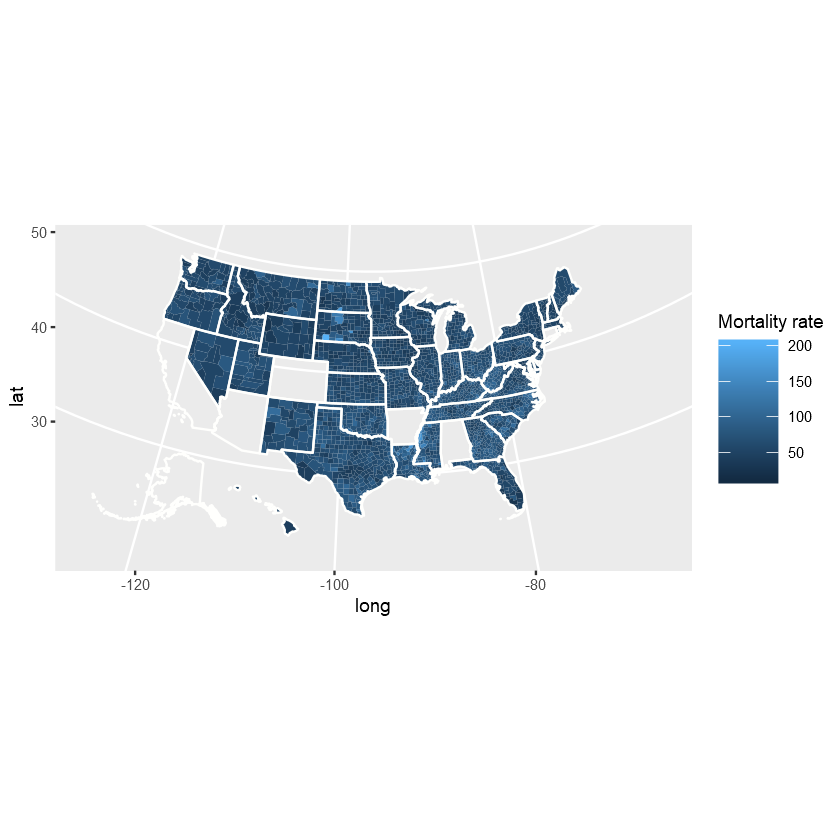

In [72]:
US_County_data %>%
  ggplot(aes(long, lat, group = group, fill = MORTALITY_2014)) +
  geom_polygon(color = NA) +
  geom_polygon(data = states, mapping = aes(long, lat, group = group),
               fill = NA, color = "#fffffd") +
  coord_map(projection = "albers", lat0 = 39, lat1 = 45) +
  theme(legend.title = element_text(),
        legend.key.width = unit(.5, "in")) +
  labs(fill = "Mortality rate")# +
 # theme_urban_map()

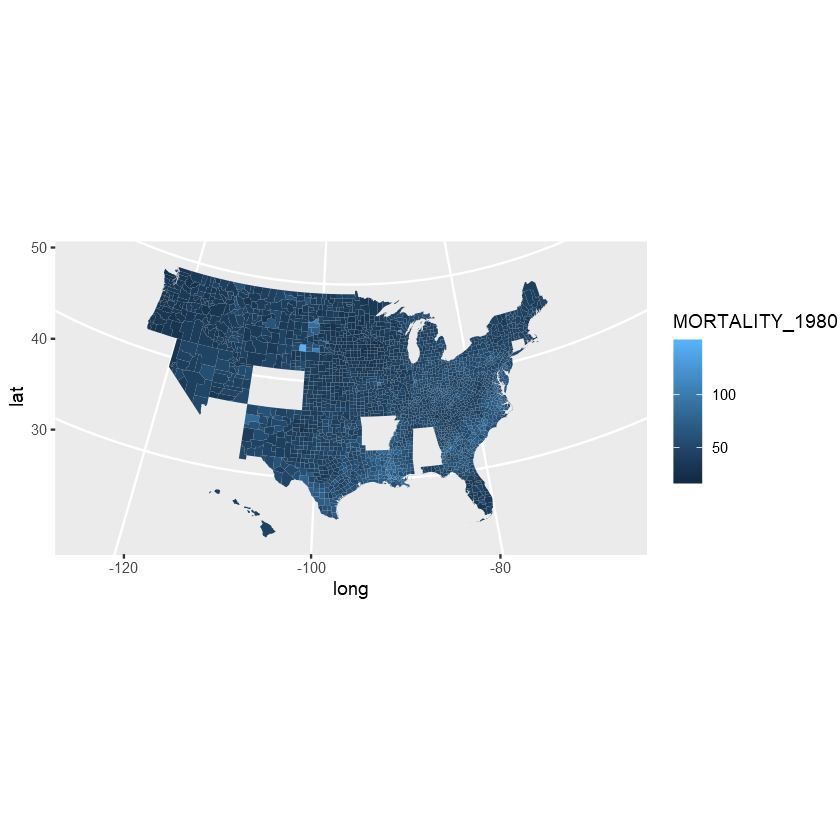

In [73]:

US_County_data %>%
  ggplot(aes(x = long, y = lat, group = group, fill = MORTALITY_1980)) +
  geom_polygon(color = NA) +
  coord_map(projection = "albers", lat0 = 39, lat1 = 45) #+
  #labs(fill = "Median Household Income")

In [74]:
library(choroplethr)
library(choroplethrMaps)

Warning message in super$initialize(map.df, user.df):
"Your data.frame contains the following regions which are not mappable: 1, 2, 2158, 4, 5, 6, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 46102, 47, 48, 49, 50, 51, 53, 54, 55, 56"Warning message in self$bind():
"The following regions were missing and are being set to NA: 46113, 51515, 2270"

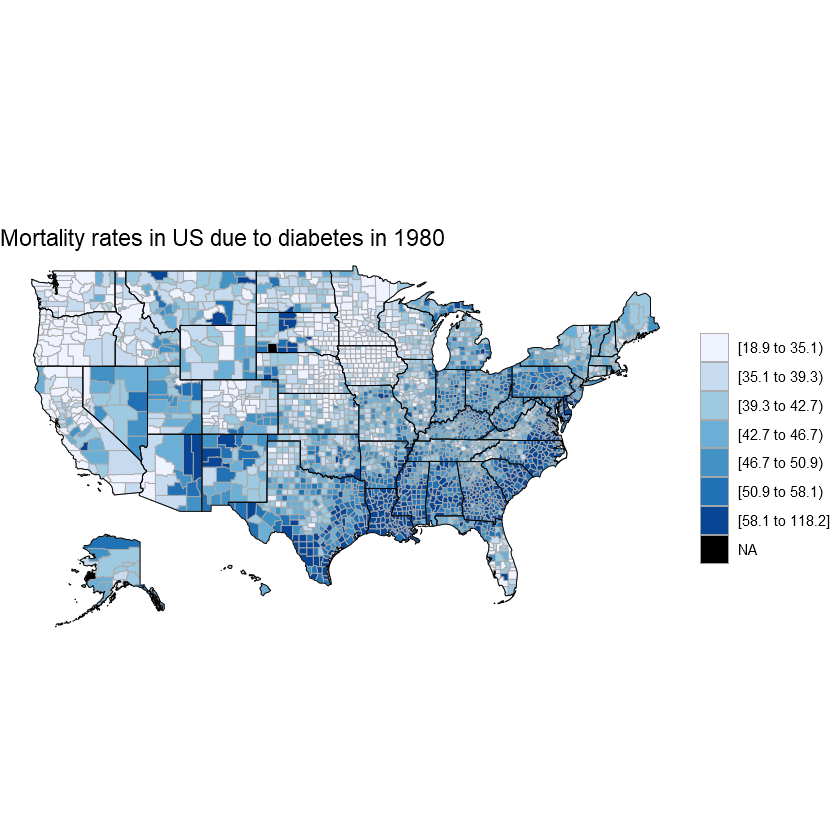

In [75]:

df_us_new <- final_us_df %>% select(FIPS, MORTALITY_1980)
df_us_new[, "MORTALITY_1980"] <- sapply(df_us_new[, "MORTALITY_1980"], as.numeric)
df_us_new[, "FIPS"] <- sapply(df_us_new[, "FIPS"], as.numeric)
columns_wanted <- c("FIPS", "MORTALITY_1980")
colnames(df_us_new) <- c("region", "value")
county_choropleth(df_us_new,title="Mortality rates in US due to diabetes in 1980")

In [75]:
final_us_df %>% head()

LOCATION,FIPS,MORTALITY_1980,MORTALITY_1985,MORTALITY_1990,MORTALITY_1995,MORTALITY_2000,MORTALITY_2005,MORTALITY_2010,MORTALITY_2014,CHANGE
Alabama,1,57.83,58.79,61.83,68.46,74.81,76.62,72.34,70.81,22.44
"Autauga County, Alabama",1001,54.08,56.46,60.00,66.41,72.61,78.25,72.46,74.98,38.63
"Baldwin County, Alabama",1003,46.30,44.87,46.33,50.03,52.70,51.59,50.44,49.57,7.06
"Barbour County, Alabama",1005,64.02,63.88,64.93,70.88,77.21,77.96,73.12,72.73,13.60
"Bibb County, Alabama",1007,72.25,75.01,75.41,81.95,88.83,88.44,82.71,79.76,10.39
"Blount County, Alabama",1009,47.44,47.08,48.28,54.50,60.21,63.60,58.38,58.72,23.78


In [77]:
final_us_df %>% nrow()

[1] 3193

In [78]:
long_final_us_df<-final_us_df %>%
  gather(key = Year, # name of new column with all the column names
         value = Mortality_Rate, # name of new column with all the values of gathered columns
         c(-LOCATION,-FIPS,-CHANGE))

In [79]:
long_final_us_df %>% select (Year)

Year
MORTALITY_1980
MORTALITY_1980
MORTALITY_1980
MORTALITY_1980
MORTALITY_1980
MORTALITY_1980
MORTALITY_1980
MORTALITY_1980
MORTALITY_1980
MORTALITY_1980


In [80]:
long_final_us_df<-long_final_us_df %>% separate(Year, c("first", "Year"), sep = "_") %>% select(-first)

In [81]:
long_final_us_df<-long_final_us_df %>% separate(LOCATION, c("County", "State"), sep = ",") 

Warning message:
"Expected 2 pieces. Missing pieces filled with `NA` in 408 rows [1, 69, 99, 115, 191, 250, 315, 324, 328, 330, 398, 558, 564, 609, 712, 805, 905, 1011, 1132, 1197, ...]."

In [82]:
long_final_us_df %>% glimpse()

Observations: 25,544
Variables: 6
$ County         <chr> "Alabama", "Autauga County", "Baldwin County", "Barb...
$ State          <chr> NA, " Alabama", " Alabama", " Alabama", " Alabama", ...
$ FIPS           <chr> "1", "1001", "1003", "1005", "1007", "1009", "1011",...
$ CHANGE         <chr> "22.44", "38.63", "7.06", "13.60", "10.39", "23.78",...
$ Year           <chr> "1980", "1980", "1980", "1980", "1980", "1980", "198...
$ Mortality_Rate <chr> "57.83", "54.08", "46.3", "64.02", "72.25", "47.44",...


In [83]:
long_final_us_df<-long_final_us_df %>% mutate(Year = as.numeric(Year))

In [84]:
long_final_us_df %>% glimpse()

Observations: 25,544
Variables: 6
$ County         <chr> "Alabama", "Autauga County", "Baldwin County", "Barb...
$ State          <chr> NA, " Alabama", " Alabama", " Alabama", " Alabama", ...
$ FIPS           <chr> "1", "1001", "1003", "1005", "1007", "1009", "1011",...
$ CHANGE         <chr> "22.44", "38.63", "7.06", "13.60", "10.39", "23.78",...
$ Year           <dbl> 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980...
$ Mortality_Rate <chr> "57.83", "54.08", "46.3", "64.02", "72.25", "47.44",...


In [85]:
long_final_us_df<-long_final_us_df %>% mutate(Mortality_Rate = as.numeric(Mortality_Rate),CHANGE = as.numeric(CHANGE))

In [86]:
long_final_us_df %>% glimpse()

Observations: 25,544
Variables: 6
$ County         <chr> "Alabama", "Autauga County", "Baldwin County", "Barb...
$ State          <chr> NA, " Alabama", " Alabama", " Alabama", " Alabama", ...
$ FIPS           <chr> "1", "1001", "1003", "1005", "1007", "1009", "1011",...
$ CHANGE         <dbl> 22.44, 38.63, 7.06, 13.60, 10.39, 23.78, 47.82, 73.5...
$ Year           <dbl> 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980...
$ Mortality_Rate <dbl> 57.83, 54.08, 46.30, 64.02, 72.25, 47.44, 73.59, 54....


In [87]:
long_final_us_df<-long_final_us_df %>% na.omit()

In [88]:
long_final_us_df %>% head()

,County,State,FIPS,CHANGE,Year,Mortality_Rate
2,Autauga County,Alabama,1001,38.63,1980,54.08
3,Baldwin County,Alabama,1003,7.06,1980,46.30
4,Barbour County,Alabama,1005,13.60,1980,64.02
5,Bibb County,Alabama,1007,10.39,1980,72.25
6,Blount County,Alabama,1009,23.78,1980,47.44
7,Bullock County,Alabama,1011,47.82,1980,73.59


In [122]:
All_Counties_Mortality_map<-long_final_us_df %>% group_by(FIPS) %>% summarize(Mean_Mortality= mean(Mortality_Rate))

Warning message in super$initialize(map.df, user.df):
"Your data.frame contains the following regions which are not mappable: 1, 2, 2158, 4, 5, 6, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 46102, 47, 48, 49, 50, 51, 53, 54, 55, 56"Warning message in self$bind():
"The following regions were missing and are being set to NA: 46113, 51515, 2270"

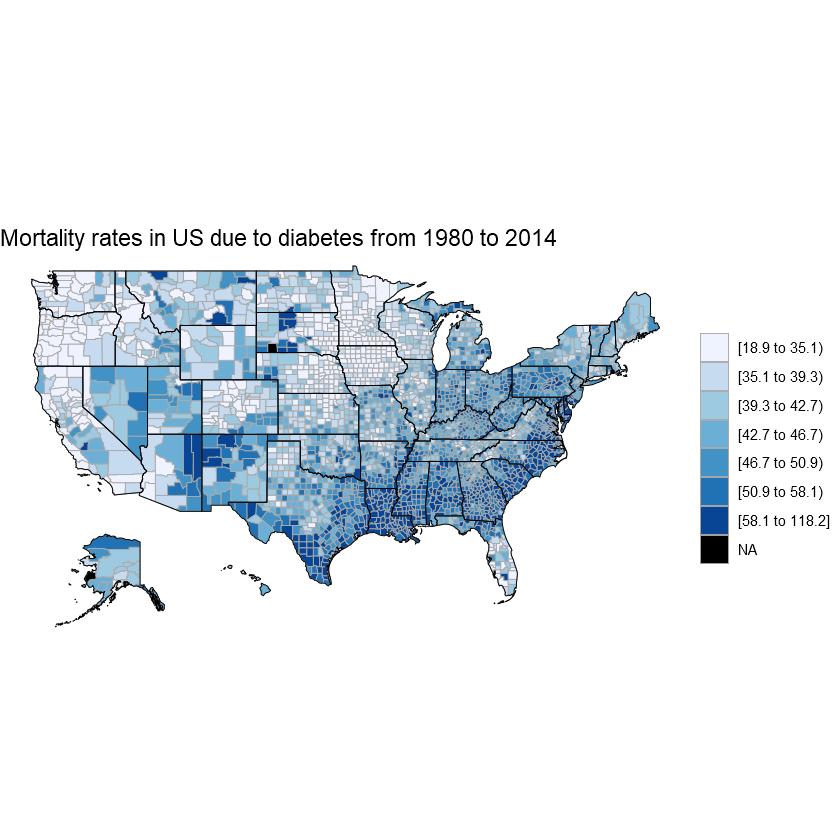

In [124]:

All_Counties_Mortality_map[, "Mean_Mortality"] <- sapply(All_Counties_Mortality_map[, "Mean_Mortality"], as.numeric)
All_Counties_Mortality_map[, "FIPS"] <- sapply(All_Counties_Mortality_map[, "FIPS"], as.numeric)
columns_wanted <- c("FIPS", "Mean_Mortality")
colnames(All_Counties_Mortality_map) <- c("region", "value")
county_choropleth(df_us_new,title="Mortality rates in US due to diabetes from 1980 to 2014")

In [91]:
All_Counties_Mortality<-long_final_us_df %>% group_by(Year) %>% summarize(Mean_Mortality= mean(Mortality_Rate))

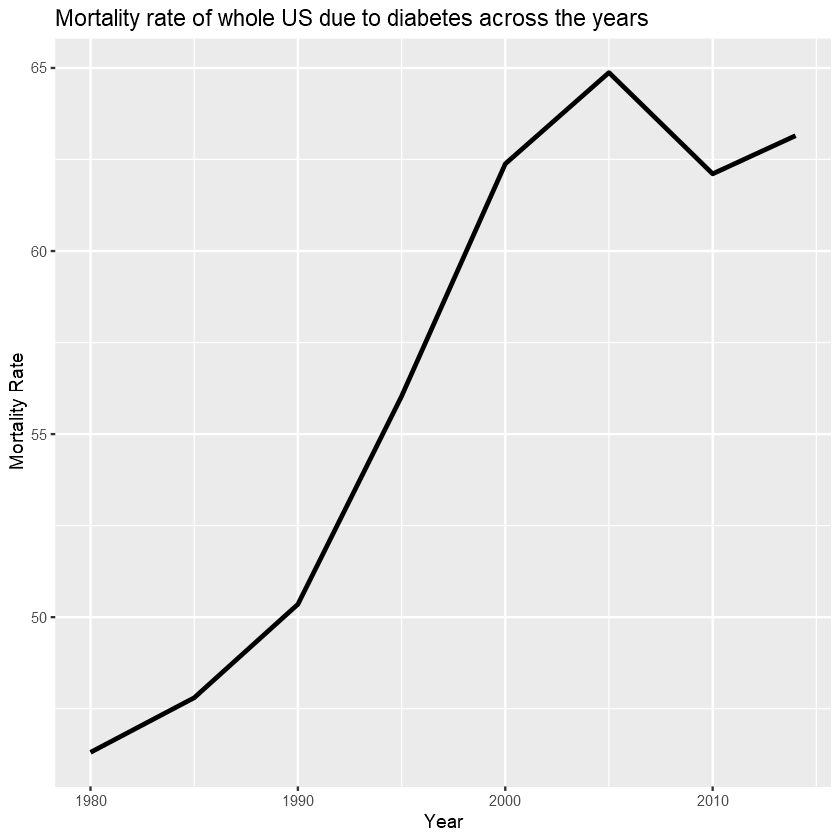

In [93]:
All_Counties_Mortality %>% #The dataset
ggplot(aes(x = Year, y = Mean_Mortality)) + #Plotting temp on x axis, cnt on y axis and colour according to season
geom_line( show.legend = TRUE,lwd=1) +ggtitle("Mortality rate of whole US due to diabetes across the years") +
#Line graph with title
xlab("Year") + ylab("Mortality Rate")

In [95]:
Top_Mortality_States<-long_final_us_df %>% group_by(State) %>% summarize(Mean_Mortality= mean(Mortality_Rate))

In [96]:
Top_Mortality_States<-Top_Mortality_States %>% arrange(desc(Mean_Mortality)) %>% slice(1:6)

In [104]:
Low_Mortality_States<-long_final_us_df %>% group_by(State) %>% summarize(Mean_Mortality= mean(Mortality_Rate))  
       

In [106]:
Low_Mortality_States<-Low_Mortality_States  %>% arrange(Mean_Mortality) %>% slice(1:4)

In [109]:
?rbind

cbind {spam},R Documentation
...,"vectors, matrices or spam objects. See ‘Details’ and ‘Value’"
force64,"logical vector of length 1. If TRUE, a 64-bit spam matrix is returned in any case. If FALSE, a 32-bit matrix is returned when possible."
deparse.level,for compatibility reason here. Only 0 is implemented.


In [110]:
Top_Low_mortality_states<-Top_Mortality_States

In [113]:
Top_Low_mortality_states<-Top_Low_mortality_states %>% rbind(Low_Mortality_States)

In [97]:
Top_Mortality_States

State,Mean_Mortality
Louisiana,82.13791
District of Columbia,79.94375
Mississippi,73.75712
South Carolina,70.72628
Alabama,69.38759
West Virginia,69.34645


In [98]:
Top_Mortality_States_Year<-long_final_us_df %>% group_by(State,Year) %>% summarize(Mean_Mortality= mean(Mortality_Rate)) %>%
                            inner_join(Top_Mortality_States %>% select(State),by="State") 

In [124]:
Top_Mortality_States_Year

State,Year,Mean_Mortality
Alabama,1980,57.56269
Alabama,1985,58.87060
Alabama,1990,61.92955
Alabama,1995,69.41179
Alabama,2000,76.78791
Alabama,2005,79.60209
Alabama,2010,75.47478
Alabama,2014,75.46134
District of Columbia,1980,79.93000
District of Columbia,1985,81.31000


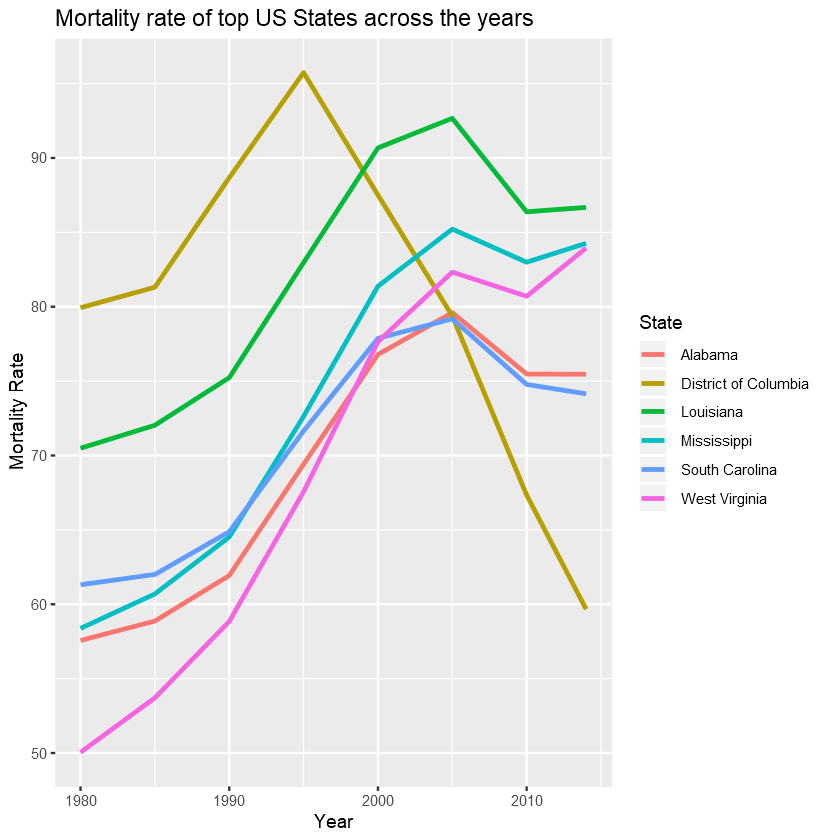

In [120]:
Top_Mortality_States_Year %>% #The dataset
ggplot(aes(x = Year, y = Mean_Mortality, colour = State)) + #Plotting temp on x axis, cnt on y axis and colour according to season
geom_line( show.legend = TRUE,lwd=1) +ggtitle("Mortality rate of top US States across the years") +
#Line graph with title
xlab("Year") + ylab("Mortality Rate")

In [114]:
Top_Mortality_States_Year2<-long_final_us_df %>% 
                            inner_join(Top_Mortality_States %>% select(State),by="State") 

In [115]:
Top_Mortality_States_Year2 %>% head()

County,State,FIPS,CHANGE,Year,Mortality_Rate
Autauga County,Alabama,1001,38.63,1980,54.08
Baldwin County,Alabama,1003,7.06,1980,46.30
Barbour County,Alabama,1005,13.60,1980,64.02
Bibb County,Alabama,1007,10.39,1980,72.25
Blount County,Alabama,1009,23.78,1980,47.44
Bullock County,Alabama,1011,47.82,1980,73.59


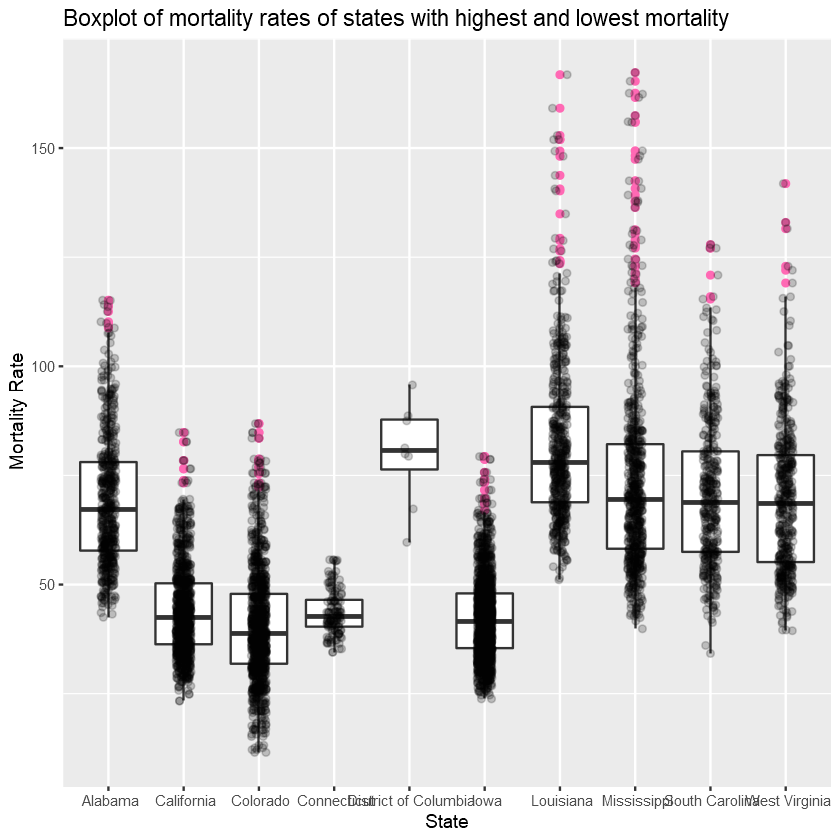

In [118]:
Top_Mortality_States_Year2 %>% ggplot(aes(x=State, y = Mortality_Rate)) + # box plot of mortality rate for each state 
geom_boxplot(outlier.colour = "hotpink" ) + #Boxplot with outliers in hot pink colour
geom_jitter(position = position_jitter(width=0.1, height =0 ), alpha =1/5) + 
#using geom_jitter to avoid over-plotting while specifying the width and height of each box along with shading value in alpha
ggtitle("Boxplot of mortality rates of states with highest and lowest mortality") + xlab("State") +ylab("Mortality Rate")